In [19]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate, BasePromptTemplate, PromptTemplate
from langchain_core.output_parsers import StrOutputParser, JsonOutputParser
from langchain.output_parsers.xml import XMLOutputParser
from pydantic import BaseModel, Field

## Text Loaders and Splitters
from langchain.document_loaders import PyPDFLoader, WebBaseLoader, TextLoader, JSONLoader, UnstructuredXMLLoader, ArxivLoader, WikipediaLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter, RecursiveJsonSplitter
from langchain_core.documents import Document
import bs4
import requests

## Embeddings
from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
# from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
# import faiss
from langchain_community.vectorstores import FAISS, Chroma
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain import hub
# import pprintr
from langchain_core.runnables import RunnablePassthrough

from langchain.agents import tool
from langchain_community.tools import WikipediaQueryRun, YouTubeSearchTool
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.tools import DuckDuckGoSearchRun


from langgraph.graph import StateGraph, END, MessagesState, START
from IPython.display import Image, display
import operator
from typing_extensions import TypedDict
from typing import Annotated, Sequence
# from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

from langgraph.prebuilt import ToolNode, tools_condition, create_react_agent
from langgraph.prebuilt import ToolNode, create_react_agent
from typing import Literal

from langgraph.types import Command
from langchain_experimental.utilities import PythonREPL


In [32]:
model = ChatOpenAI(model="gpt-4o", temperature=0.0, max_retries=3)

In [12]:
key = os.getenv("TAVILY_API_KEY")
tavily_tool = TavilySearchResults(api_key=key)

/var/folders/6p/ddx1yx2j547512yh8wlgztw00000gn/T/ipykernel_24425/4280750209.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults(api_key=key)


In [6]:
model.invoke("Who is the PM of France")

AIMessage(content='As of October 2023, the Prime Minister of France is Élisabeth Borne. She has been in office since May 2022.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 13, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ff25b2783a', 'id': 'chatcmpl-C3GgOPqvKbr5kH0HMIyLY6VeiImwY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4520f859-0533-46c0-bb1d-91280d9010a1-0', usage_metadata={'input_tokens': 13, 'output_tokens': 30, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [13]:
tavily_tool.invoke("Who is the PM of France")

[{'title': 'Prime Minister of France - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Prime_Minister_of_France',
  'content': 'The current prime minister is François Bayrou, who was appointed on 13 December 2024.(\n\nNomination\n----------\n\n[edit] [...] | Prime Minister of the French Republic |\n| --- |\n| _Premier ministre de la République française_ |\n| Image 4 Emblem of the French Republic |\n| Image 5 Flag of France |\n| Image 6.jpg) Incumbent François Bayrou since 13 December 2024 |\n|  Council of Ministers of the French Republic  Government of France |\n| Style "Style (form of address)") |  Mr. Prime Minister (informal)  His Excellency (diplomatic) |\n| Status | Head of government | [...] This article is part of a series on\nPolitics of France\nImage 7\n\nConstitutions\n\n   Fifth Republic\n   _Declaration of the Rights of Man and of the Citizen_\nExecutive\n\n   President (list)\n   Emmanuel Macron (RE "Renaissance (French political party)"))\n\n  \n\n   Prime Minister (

## Create Tools

In [21]:
@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = PythonREPL().run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER."
    )
    

<>:13: DeprecationWarning: invalid escape sequence '\`'
<>:13: DeprecationWarning: invalid escape sequence '\`'
<>:13: DeprecationWarning: invalid escape sequence '\`'
<>:13: DeprecationWarning: invalid escape sequence '\`'
/var/folders/6p/ddx1yx2j547512yh8wlgztw00000gn/T/ipykernel_24425/1196665098.py:13: DeprecationWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
/var/folders/6p/ddx1yx2j547512yh8wlgztw00000gn/T/ipykernel_24425/1196665098.py:13: DeprecationWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"


In [14]:
def make_system_prompt(instruction:str)->str:
    return  (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{instruction}"
    )

In [48]:
def router(last_message:BaseMessage, goto:str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return goto

## Create Agents

In [54]:
def search_agent(state: MessagesState) -> Command[Literal["calculation", "__end__"]]:
    agent1 = create_react_agent(model = model, tools=[tavily_tool], prompt=make_system_prompt("You can only do internet search. You are working with a calculation/generate chart colleague."))
    result = agent1.invoke(state)

    print("Result in search agent 1 - ", result)
    print("Result in search agent 2 - ", result["messages"])
    goto=router(result["messages"][-1], "calculation")
    print("GOTO in search agent is - ", goto)

    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="search")

    return Command(goto=goto, update={"messages": result["messages"]})

def calculation_agent(state: MessagesState) -> Command[Literal["search", "__end__"]]:
    agent2 = create_react_agent(model = model, tools=[python_repl_tool], prompt=make_system_prompt("You can only generate charts. You are working with a internet colleague."))
    result = agent2.invoke(state)

    print("Result in calculation agent 1 - ", result)
    print("Result in calculation agent 2 - ", result["messages"])
    goto=router(result["messages"][-1], "search")
    print("GOTO in calculation agent is - ", goto)

    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="calculation")

    return Command(goto=goto, update={"messages": result["messages"]})

## Create Graph

In [55]:
graph = StateGraph(MessagesState)

graph.add_node("search", search_agent)
graph.add_node("calculation", calculation_agent)

graph.add_edge(START, "search")

/Users/mac/Desktop/Agentic-AI/venv-3-10/lib/python3.10/site-packages/langgraph/graph/state.py:911: LangGraphDeprecatedSinceV10: `config_type` is deprecated and will be removed. Please use `context_schema` instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  super().__init__(**kwargs)


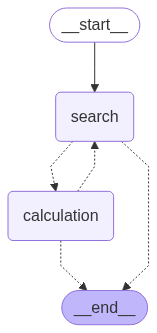

In [56]:
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

/Users/mac/Desktop/Agentic-AI/venv-3-10/lib/python3.10/site-packages/langgraph/graph/state.py:911: LangGraphDeprecatedSinceV10: `config_type` is deprecated and will be removed. Please use `context_schema` instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  super().__init__(**kwargs)


Result in search agent 1 -  {'messages': [HumanMessage(content="get the UK's GDP over the past 3 years", additional_kwargs={}, response_metadata={}, id='1eaf6b80-c4a4-439d-8153-b42a06827fb6'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ShJQBAfTWufWN1nu06c5LJhF', 'function': {'arguments': '{"query":"UK GDP 2020 2021 2022"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 192, 'total_tokens': 220, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-C3I7kqai1surANDIrrHN9y7urUfhJ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1829e8da-a9ac-4a81-a46f-683cd7a06af3-0', tool_calls=

/Users/mac/Desktop/Agentic-AI/venv-3-10/lib/python3.10/site-packages/langgraph/graph/state.py:911: LangGraphDeprecatedSinceV10: `config_type` is deprecated and will be removed. Please use `context_schema` instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  super().__init__(**kwargs)


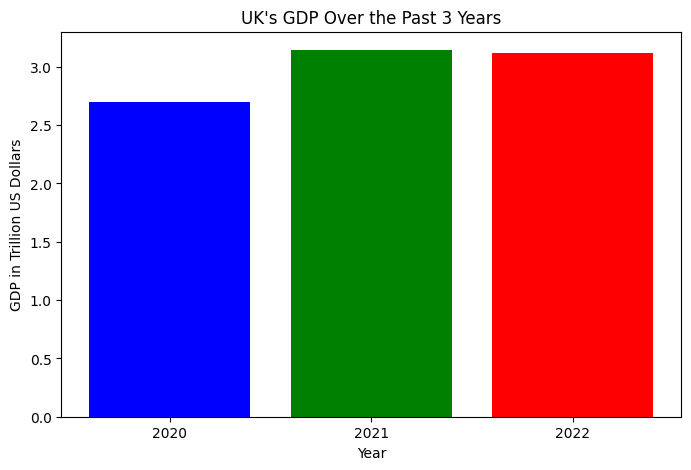

Result in calculation agent 1 -  {'messages': [HumanMessage(content="get the UK's GDP over the past 3 years", additional_kwargs={}, response_metadata={}, id='1eaf6b80-c4a4-439d-8153-b42a06827fb6'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ShJQBAfTWufWN1nu06c5LJhF', 'function': {'arguments': '{"query":"UK GDP 2020 2021 2022"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 192, 'total_tokens': 220, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-C3I7kqai1surANDIrrHN9y7urUfhJ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1829e8da-a9ac-4a81-a46f-683cd7a06af3-0', tool_c

{'messages': [HumanMessage(content="get the UK's GDP over the past 3 years", additional_kwargs={}, response_metadata={}, id='1eaf6b80-c4a4-439d-8153-b42a06827fb6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ShJQBAfTWufWN1nu06c5LJhF', 'function': {'arguments': '{"query":"UK GDP 2020 2021 2022"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 192, 'total_tokens': 220, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-C3I7kqai1surANDIrrHN9y7urUfhJ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1829e8da-a9ac-4a81-a46f-683cd7a06af3-0', tool_calls=[{'name': 'tavily_search_r

In [57]:
app.invoke({"messages": [("get the UK's GDP over the past 3 years")],})

In [ ]:
app.invoke({"messages": [("get the UK's GDP over the past 3 years, then make a line chart of it.Once you make the chart, finish.")],})

/Users/mac/Desktop/Agentic-AI/venv-3-10/lib/python3.10/site-packages/langgraph/graph/state.py:911: LangGraphDeprecatedSinceV10: `config_type` is deprecated and will be removed. Please use `context_schema` instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  super().__init__(**kwargs)
